In [85]:
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import PseudoVoigtModel, LinearModel, GaussianModel, LorentzianModel, SplitLorentzianModel

from extra_geom import AGIPD_1MGeometry
from extra_geom import agipd_asic_seams
from pyFAI.azimuthalIntegrator import AzimuthalIntegrator

In [39]:
with h5py.File("1D_profile.h5","r") as h5:
    Q = h5["Q"][11:-64]
    I = h5["intensity"][11:-64]

In [40]:
%matplotlib notebook

<IPython.core.display.Javascript object>


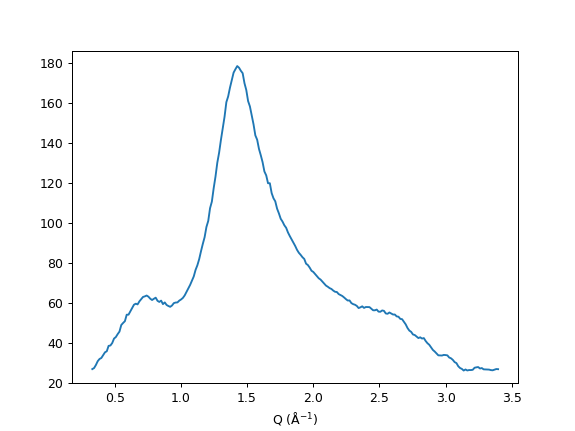

Text(0.5, 0, '$\\rm Q\\ (\\AA^{-1})$')

In [42]:
plt.figure()
plt.plot(Q,I)
# plt.xlim(0.18,3.4)
plt.ylim(bottom=20)
plt.xlabel(r'$\rm Q\ (\AA^{-1})$')

[lmfit.models.PseudoVoigtModel](https://lmfit.github.io/lmfit-py/builtin_models.html#lmfit.models.PseudoVoigtModel)
```
class PseudoVoigtModel(independent_vars=['x'], prefix='', nan_policy='raise', **kwargs)
```
[lmfit.models.LinearModel](https://lmfit.github.io/lmfit-py/builtin_models.html#lmfit.models.LinearModel)
```
class LinearModel(independent_vars=['x'], prefix='', nan_policy='raise', **kwargs)
```

In [ ]:
def fitting(X,yData):    
    offset = LinearModel()
    pars_x = offset.make_params(slope=0, intercept=25)

    peak1 = PseudoVoigtModel(prefix='p1_')
    pars_x += peak1.guess(yData, x=X, amplitude=60, center=0.731)  
    
    mod = peak + offset
    out_x = mod.fit(yData, pars_x, x=X)
    x_m = out_x.params['center'].value
    hx_m = out_x.eval(x=x_m)
    sigma_x = out_x.params['sigma'].value
    FWHM_x = 2*np.sqrt(2*np.log(2))*sigma_x
    fit_results = [x_m,hx_m,sigma_x,FHWM_x]
    return fit_results,out_x.best_fit

In [69]:
X = Q
yData = I
offset = LinearModel(prefix='off_')
pars_x = offset.make_params(slope=0, intercept=25)

peak1 = PseudoVoigtModel(prefix='p1_')
pars_x += peak1.guess(yData, x=X, amplitude=60, center=0.731)
pars_x["p1_center"].max=0.969
pars_x["p1_center"].min=0.472

peak2 = PseudoVoigtModel(prefix='p2_')
pars_x += peak2.guess(yData, x=X, amplitude=170, center=1.41)
pars_x["p2_center"].max=1.90
pars_x["p2_center"].min=1.24
mod = offset + peak1 + peak2

init = mod.eval(pars_x, x=X)
out = mod.fit(yData, pars_x, x=X)

In [70]:
print(out.fit_report())

[[Model]]
    ((Model(linear, prefix='off_') + Model(pvoigt, prefix='p1_')) + Model(pvoigt, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 231
    # data points      = 225
    # variables        = 10
    chi-square         = 16500.4830
    reduced chi-square = 76.7464326
    Akaike info crit   = 986.385019
    Bayesian info crit = 1020.54602
[[Variables]]
    off_slope:      2.90562128 +/- 2.10677937 (72.51%) (init = 0)
    off_intercept:  26.1520026 +/- 6.85187632 (26.20%) (init = 25)
    p1_amplitude:   3.78845420 +/- 4.75304259 (125.46%) (init = 60)
    p1_center:      0.68931786 +/- 0.02246679 (3.26%) (init = 0.731)
    p1_sigma:       0.11024987 +/- 0.03053055 (27.69%) (init = 0.2601245)
    p1_fraction:    1.3690e-09 +/- 2.08988756 (152652491536.76%) (init = 0.5)
    p1_fwhm:        0.22049974 +/- 0.06106111 (27.69%) == '2.0000000*p1_sigma'
    p1_height:      16.1406772 +/- 20.2904891 (125.71%) == '(((1-p1_fraction)*p1_amplitude)/max(

<IPython.core.display.Javascript object>


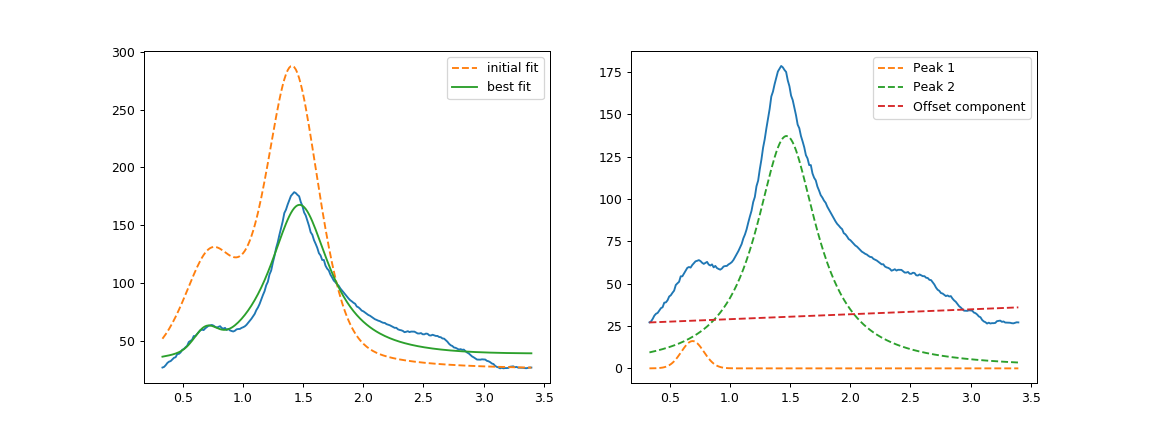

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(X, yData)
axes[0].plot(X, init, '--', label='initial fit')
axes[0].plot(X, out.best_fit, '-', label='best fit')
axes[0].legend()


comps = out.eval_components(x=X)
axes[1].plot(X, yData)
axes[1].plot(X, comps['p1_'], '--', label='Peak 1')
axes[1].plot(X, comps['p2_'], '--', label='Peak 2')
axes[1].plot(X, comps['off_'], '--', label='Offset component')
axes[1].legend()

In [74]:
X = Q
yData = I
# offset = LinearModel(prefix='off_')
# pars_x = offset.make_params(slope=0, intercept=25)

peak1 = PseudoVoigtModel(prefix='p1_')
pars_x = peak1.guess(yData, x=X, amplitude=60, center=0.731)
pars_x["p1_center"].max=0.969
pars_x["p1_center"].min=0.472

peak2 = PseudoVoigtModel(prefix='p2_')
pars_x += peak2.guess(yData, x=X, amplitude=170, center=1.41)
pars_x["p2_center"].max=1.90
pars_x["p2_center"].min=1.24
mod = peak1 + peak2
# mod = offset + peak1 + peak2

init = mod.eval(pars_x, x=X)
out = mod.fit(yData, pars_x, x=X)
print(out.fit_report())

[[Model]]
    (Model(pvoigt, prefix='p1_') + Model(pvoigt, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 496
    # data points      = 225
    # variables        = 8
    chi-square         = 51408.1698
    reduced chi-square = 236.904008
    Akaike info crit   = 1238.07670
    Bayesian info crit = 1265.40550
[[Variables]]
    p1_amplitude:  2.71854167 +/- 4.47852867 (164.74%) (init = 60)
    p1_center:     0.63990175 +/- 0.04527207 (7.07%) (init = 0.731)
    p1_sigma:      0.10094980 +/- 0.06307826 (62.48%) (init = 0.2601245)
    p1_fraction:   1.6240e-05 +/- 3.86935022 (23826300.59%) (init = 0.5)
    p1_fwhm:       0.20189959 +/- 0.12615652 (62.48%) == '2.0000000*p1_sigma'
    p1_height:     12.6492877 +/- 9.29445727 (73.48%) == '(((1-p1_fraction)*p1_amplitude)/max(1e-15, (p1_sigma*sqrt(pi/log(2))))+(p1_fraction*p1_amplitude)/max(1e-15, (pi*p1_sigma)))'
    p2_amplitude:  273.912839 +/- 10.6874539 (3.90%) (init = 170)
    p2_center:     1.5

<IPython.core.display.Javascript object>


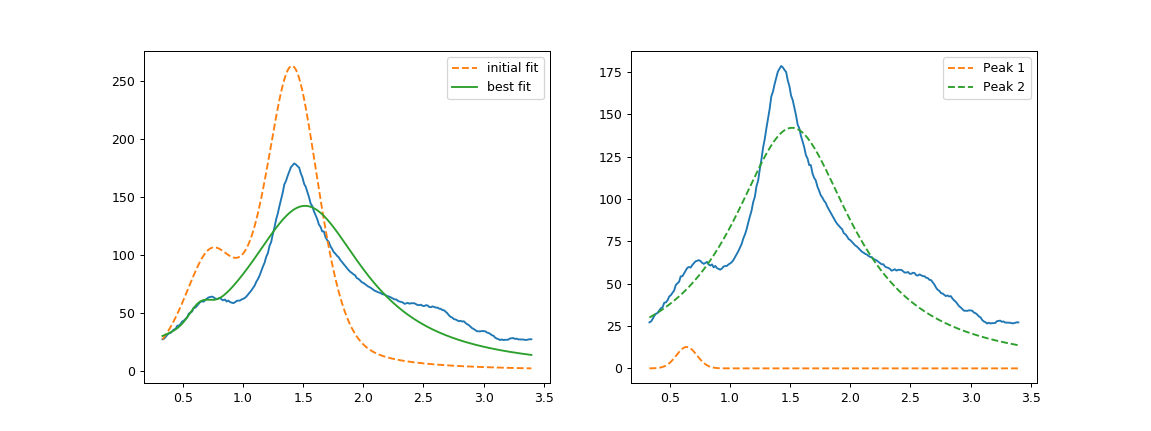

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(X, yData)
axes[0].plot(X, init, '--', label='initial fit')
axes[0].plot(X, out.best_fit, '-', label='best fit')
axes[0].legend()


comps = out.eval_components(x=X)
axes[1].plot(X, yData)
axes[1].plot(X, comps['p1_'], '--', label='Peak 1')
axes[1].plot(X, comps['p2_'], '--', label='Peak 2')
axes[1].legend()

<IPython.core.display.Javascript object>


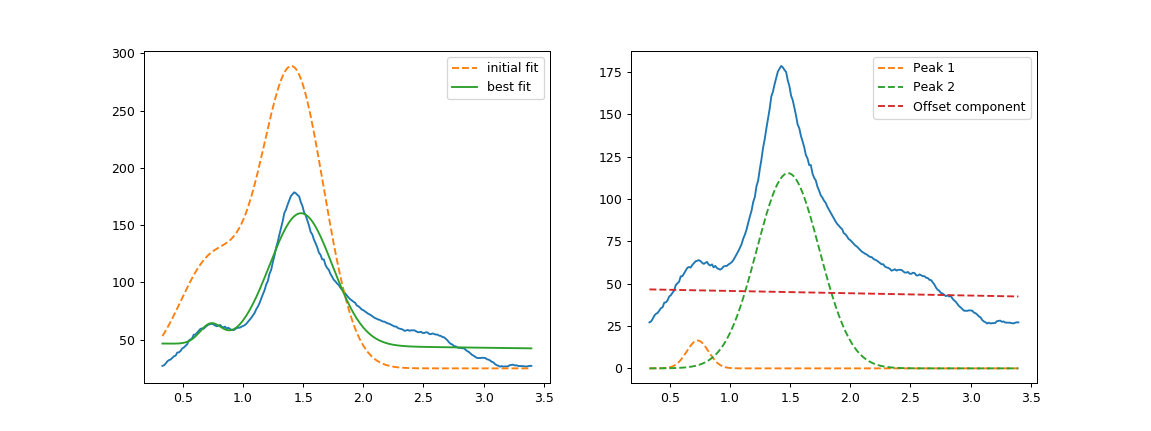

In [77]:
X = Q
yData = I
offset = LinearModel(prefix='off_')
pars_x = offset.make_params(slope=0, intercept=25)

peak1 = GaussianModel(prefix='p1_')
pars_x += peak1.guess(yData, x=X, amplitude=60, center=0.731)
pars_x["p1_center"].max=0.969
pars_x["p1_center"].min=0.472

peak2 = GaussianModel(prefix='p2_')
pars_x += peak2.guess(yData, x=X, amplitude=170, center=1.41)
pars_x["p2_center"].max=1.90
pars_x["p2_center"].min=1.24
mod = offset + peak1 + peak2

init = mod.eval(pars_x, x=X)
out = mod.fit(yData, pars_x, x=X)

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(X, yData)
axes[0].plot(X, init, '--', label='initial fit')
axes[0].plot(X, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=X)
axes[1].plot(X, yData)
axes[1].plot(X, comps['p1_'], '--', label='Peak 1')
axes[1].plot(X, comps['p2_'], '--', label='Peak 2')
axes[1].plot(X, comps['off_'], '--', label='Offset component')
axes[1].legend()

<IPython.core.display.Javascript object>


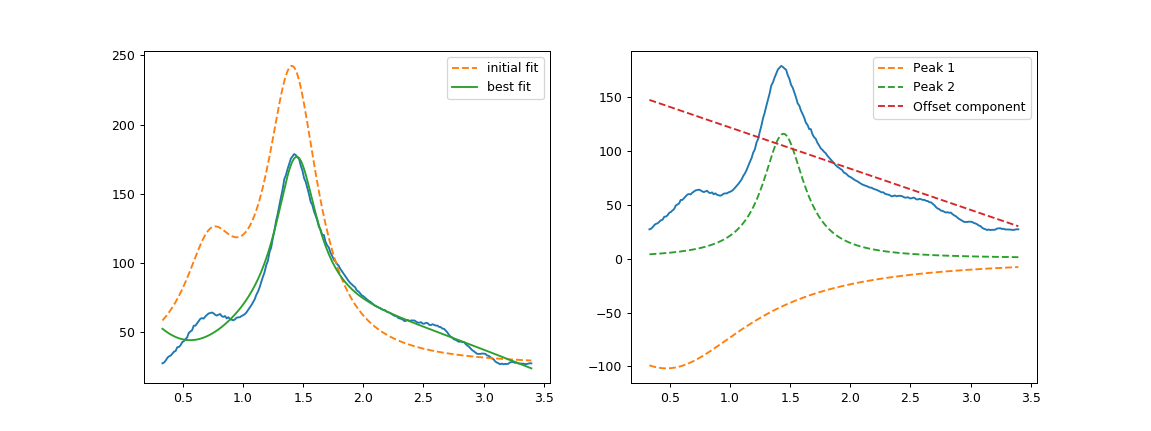

In [79]:
X = Q
yData = I
offset = LinearModel(prefix='off_')
pars_x = offset.make_params(slope=0, intercept=25)

peak1 = LorentzianModel(prefix='p1_')
pars_x += peak1.guess(yData, x=X, amplitude=60, center=0.731)
pars_x["p1_center"].max=0.969
pars_x["p1_center"].min=0.472

peak2 = LorentzianModel(prefix='p2_')
pars_x += peak2.guess(yData, x=X, amplitude=170, center=1.41)
pars_x["p2_center"].max=1.90
pars_x["p2_center"].min=1.24
mod = offset + peak1 + peak2

init = mod.eval(pars_x, x=X)
out = mod.fit(yData, pars_x, x=X)

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(X, yData)
axes[0].plot(X, init, '--', label='initial fit')
axes[0].plot(X, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=X)
axes[1].plot(X, yData)
axes[1].plot(X, comps['p1_'], '--', label='Peak 1')
axes[1].plot(X, comps['p2_'], '--', label='Peak 2')
axes[1].plot(X, comps['off_'], '--', label='Offset component')
axes[1].legend()

<IPython.core.display.Javascript object>


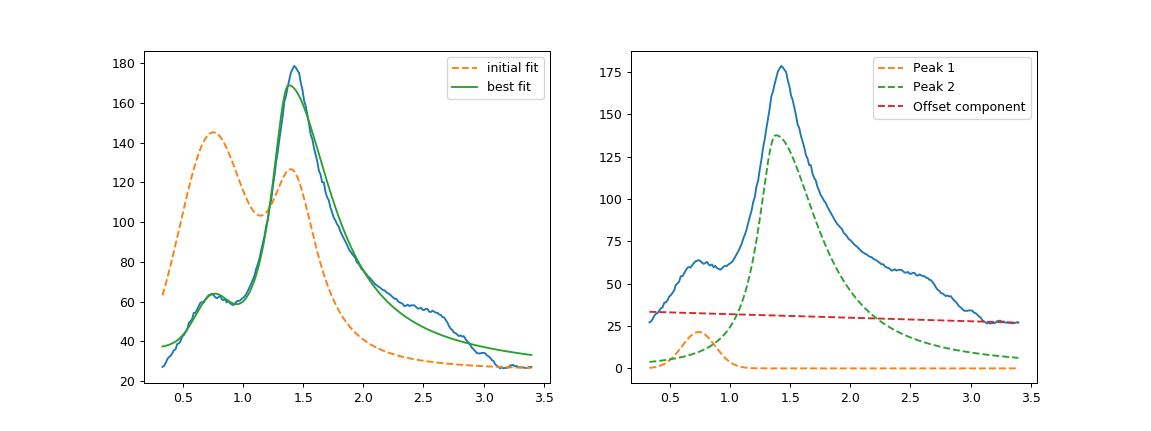

In [89]:
X = Q
yData = I
offset = LinearModel(prefix='off_')
pars_x = offset.make_params(slope=0, intercept=25)
pars_x["off_intercept"].max=50
pars_x["off_intercept"].min=0


peak1 = GaussianModel(prefix='p1_')
pars_x += peak1.guess(yData, x=X, amplitude=70, center=0.731)
pars_x["p1_center"].max=0.969
pars_x["p1_center"].min=0.472

peak2 = SplitLorentzianModel(prefix='p2_')
pars_x += peak2.guess(yData, x=X, amplitude=80, center=1.41)
pars_x["p2_center"].max=1.90
pars_x["p2_center"].min=1.24
mod = offset + peak1 + peak2

init = mod.eval(pars_x, x=X)
out = mod.fit(yData, pars_x, x=X)

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(X, yData)
axes[0].plot(X, init, '--', label='initial fit')
axes[0].plot(X, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=X)
axes[1].plot(X, yData)
axes[1].plot(X, comps['p1_'], '--', label='Peak 1')
axes[1].plot(X, comps['p2_'], '--', label='Peak 2')
axes[1].plot(X, comps['off_'], '--', label='Offset component')
axes[1].legend()

<IPython.core.display.Javascript object>


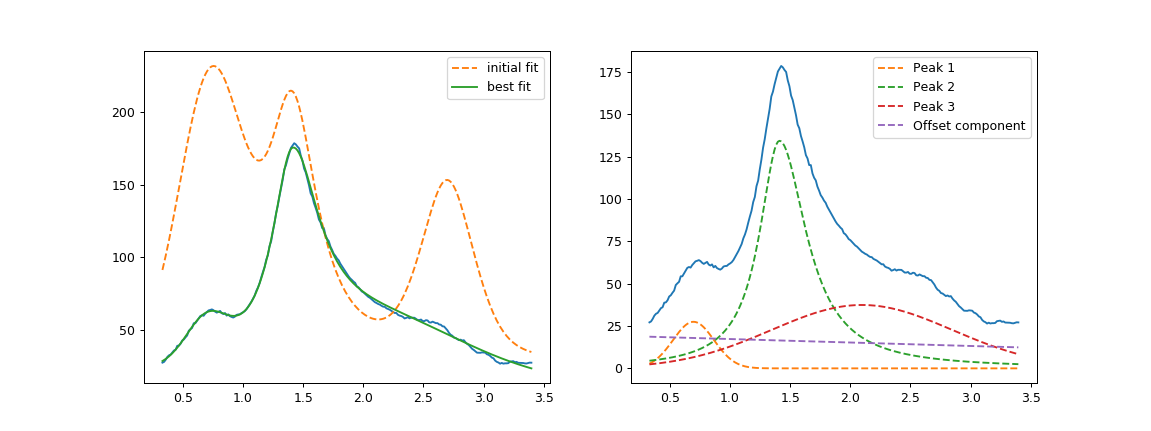

In [91]:
X = Q
yData = I
offset = LinearModel(prefix='off_')
pars_x = offset.make_params(slope=0, intercept=25)
pars_x["off_intercept"].max=50
pars_x["off_intercept"].min=0


peak1 = GaussianModel(prefix='p1_')
pars_x += peak1.guess(yData, x=X, center=0.731)
pars_x["p1_center"].max=0.969
pars_x["p1_center"].min=0.472

peak2 = SplitLorentzianModel(prefix='p2_')
pars_x += peak2.guess(yData, x=X, center=1.41)
pars_x["p2_center"].max=1.90
pars_x["p2_center"].min=1.24

peak3 = PseudoVoigtModel(prefix='p3_')
pars_x += peak3.guess(yData, x=X, amplitude=80, center=2.7)
# pars_x["p2_center"].max=1.90
pars_x["p3_center"].min=2.0


mod = offset + peak1 + peak2 + peak3

init = mod.eval(pars_x, x=X)
out = mod.fit(yData, pars_x, x=X)

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(X, yData)
axes[0].plot(X, init, '--', label='initial fit')
axes[0].plot(X, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=X)
axes[1].plot(X, yData)
axes[1].plot(X, comps['p1_'], '--', label='Peak 1')
axes[1].plot(X, comps['p2_'], '--', label='Peak 2')
axes[1].plot(X, comps['p3_'], '--', label='Peak 3')
axes[1].plot(X, comps['off_'], '--', label='Offset component')
axes[1].legend()

<IPython.core.display.Javascript object>


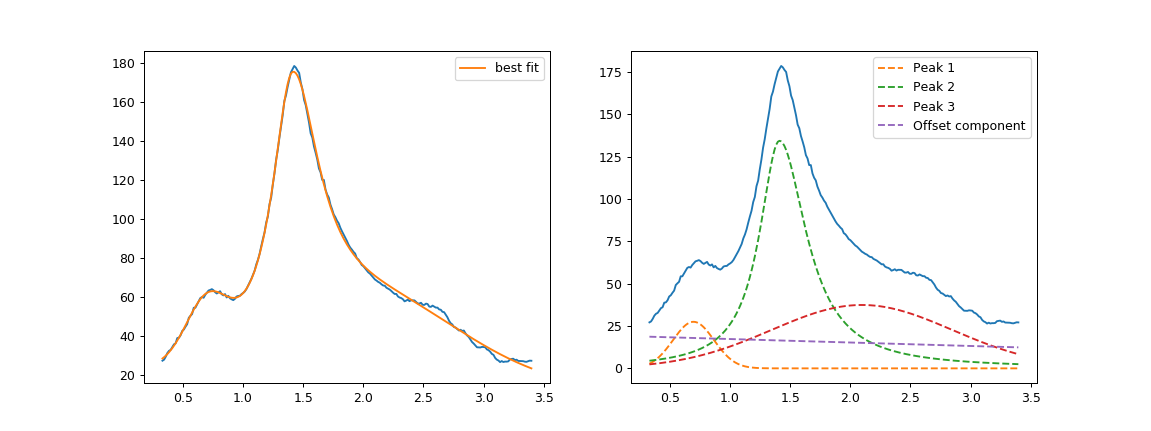

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(X, yData)
# axes[0].plot(X, init, '--', label='initial fit')
axes[0].plot(X, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=X)
axes[1].plot(X, yData)
axes[1].plot(X, comps['p1_'], '--', label='Peak 1')
axes[1].plot(X, comps['p2_'], '--', label='Peak 2')
axes[1].plot(X, comps['p3_'], '--', label='Peak 3')
axes[1].plot(X, comps['off_'], '--', label='Offset component')
axes[1].legend()
plt.savefig("fitting.png",dpi=200)